[View in Colaboratory](https://colab.research.google.com/github/gitgash/ds-test/blob/master/ann_estimator.ipynb)

# Introduction
This work have been proceed as test job for data scientist position.  
Requrements: get [data](https://www.dropbox.com/s/tzb7mjxipz8fnyt/dataset.csv?dl=1) and make estimator with highest f1 metric.
Dirung this work it have been done: data exploration, 'traditional' model creation and artificial neural network model creation.
Results considered in conclusion section.  
Google (tm) [Colab.research](https://colab.research.google.com) have been used in this work, but methodology and technology (jupyter notebbok) tools can be used in any suitable environment (python, scikit learn, pandas, numpy, tesorflow, keras).  
So lets start.

# Data Exploration
In process of data exploration following steps have been proceed:
1. Loading data
1. Simple exploration
1. Correlation analisys


## Load data
Data file have been place to dropbox so we load them from there by url.

In [2]:
# It is preleminary section 
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Using TensorFlow backend.


In [77]:
!pip install -U imbalanced-learn

    100% |████████████████████████████████| 153kB 4.3MB/s 


In [0]:
df = pd.read_csv("https://www.dropbox.com/s/tzb7mjxipz8fnyt/dataset.csv?dl=1")


In [0]:
# df_num_corr = df.corr()['label'][:-1]
# abs_corr = abs(df_num_corr)
# no_corr_list = abs_corr[abs_corr.isna()].index.values.tolist()
# df1 = df.drop(no_corr_list, axis=1)

In [91]:
# crete X and y
X = df.iloc[:,1:-1].copy()
y = keras.utils.to_categorical(df['label'] - 1, num_classes=5)

# divide to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3623467829)
# preprocess features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
pca = PCA(n_components=512)
pca.fit(X_train)
X_train = pca.transform(X_train)

# balance train set
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = SMOTE().fit_sample(X_train, np.argmax(y_train, 1))
X_train = X_resampled
y_train = keras.utils.to_categorical(y_resampled, num_classes=5)
from collections import Counter
print(sorted(Counter(y_resampled).items()))


[(0, 12181), (1, 12181), (2, 12181), (3, 12181), (4, 12181)]


In [92]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=512))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=150,
          batch_size=128)



Epoch 1/50
60905/60905 [==============================] - 35s 580us/step - loss: 1.5209 - acc: 0.3139
Epoch 2/50
60905/60905 [==============================] - 34s 552us/step - loss: 1.4612 - acc: 0.3547
Epoch 3/50
60905/60905 [==============================] - 33s 544us/step - loss: 1.4025 - acc: 0.3954
Epoch 4/50
60905/60905 [==============================] - 33s 543us/step - loss: 1.3349 - acc: 0.4301
Epoch 5/50
60905/60905 [==============================] - 34s 551us/step - loss: 1.2641 - acc: 0.4675
Epoch 6/50
60905/60905 [==============================] - 34s 551us/step - loss: 1.1981 - acc: 0.4983
Epoch 7/50
60905/60905 [==============================] - 34s 553us/step - loss: 1.1363 - acc: 0.5242
Epoch 8/50
60905/60905 [==============================] - 33s 549us/step - loss: 1.0750 - acc: 0.5524
Epoch 9/50
60905/60905 [==============================] - 33s 548us/step - loss: 1.0272 - acc: 0.5730
Epoch 10/50
60905/60905 [==============================] - 34s 560us/step - loss: 

In [95]:
model.fit(X_train, y_train,
          epochs=100,
          batch_size=128)

Epoch 1/100
60905/60905 [==============================] - 35s 570us/step - loss: 0.2641 - acc: 0.8987
Epoch 2/100
60905/60905 [==============================] - 35s 571us/step - loss: 0.2556 - acc: 0.9034
Epoch 3/100
60905/60905 [==============================] - 34s 564us/step - loss: 0.2497 - acc: 0.9054
Epoch 4/100
60905/60905 [==============================] - 34s 561us/step - loss: 0.2494 - acc: 0.9068
Epoch 5/100
60905/60905 [==============================] - 34s 565us/step - loss: 0.2406 - acc: 0.9078
Epoch 6/100
60905/60905 [==============================] - 34s 561us/step - loss: 0.2379 - acc: 0.9091
Epoch 7/100
60905/60905 [==============================] - 34s 559us/step - loss: 0.2274 - acc: 0.9142
Epoch 8/100
60905/60905 [==============================] - 34s 556us/step - loss: 0.2253 - acc: 0.9142
Epoch 9/100
60905/60905 [==============================] - 34s 552us/step - loss: 0.2248 - acc: 0.9147
Epoch 10/100
60905/60905 [==============================] - 34s 563us/ste

In [96]:
# make prediction on test set
X_test_2 = pca.transform(scaler.transform(X_test))
# X_test_2 = scaler.transform(X_test)

y_pred = model.predict(X_test_2)
# calculate f1 weighted score
score = model.evaluate(X_test_2, y_test, batch_size=128)
print("Score = %f" % score[1])
print("F1 weighted score %f" % f1_score(np.argmax(y_test, 1), np.argmax(y_pred, 1), average='weighted'))
print("F1 macro score %f" % f1_score(np.argmax(y_test, 1), np.argmax(y_pred, 1), average='macro'))

2813/2813 [==============================] - 0s 148us/step
Score = 0.367579
F1 weighted score 0.372251
F1 macro score 0.271038


Confusion matrix, without normalization
[[ 69  35  34  37  80]
 [ 27  18  35  26  45]
 [ 34  25  64 100 148]
 [ 51  34  89 208 316]
 [ 85  70 177 331 675]]


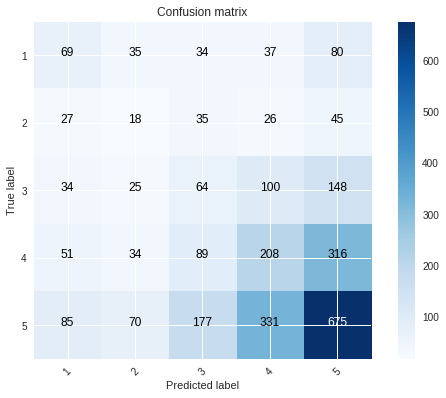

In [97]:
cnf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(y_pred, 1))
plot_confusion_matrix(cnf_matrix,[1,2,3,4,5])

Stacking binary classifiers with shallow multiclass classifier
===============================================

In [46]:
models = []
train_data = np.empty_like(y_train)
for i in range(0,5):  
  bmodel = Sequential()
  bmodel.add(Dense(512, activation='relu', input_dim=512))
  bmodel.add(Dropout(0.2))
  bmodel.add(Dense(1024, activation='relu'))
  bmodel.add(Dropout(0.2))
  bmodel.add(Dense(1024, activation='relu'))
  bmodel.add(Dropout(0.2))
  bmodel.add(Dense(512, activation='relu'))
  bmodel.add(Dropout(0.2))
  bmodel.add(Dense(1, activation='sigmoid'))
  sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
  bmodel.compile(loss='binary_crossentropy',
                optimizer=sgd,
                metrics=['accuracy'])
  bmodel.fit(X_train, (np.argmax(y_train, 1)==i)+0,
            epochs=50,
            batch_size=128)
  models.append(bmodel)
  r = bmodel.predict(X_train)
  train_data[:,i] = r.reshape(1, len(r))



Epoch 1/50
25312/25312 [==============================] - 15s 573us/step - loss: 0.2935 - acc: 0.9119
Epoch 2/50
25312/25312 [==============================] - 14s 546us/step - loss: 0.2655 - acc: 0.9139
Epoch 3/50
25312/25312 [==============================] - 13s 533us/step - loss: 0.2613 - acc: 0.9138
Epoch 4/50
25312/25312 [==============================] - 15s 591us/step - loss: 0.2561 - acc: 0.9144
Epoch 5/50
25312/25312 [==============================] - 14s 551us/step - loss: 0.2533 - acc: 0.9143
Epoch 6/50
25312/25312 [==============================] - 14s 541us/step - loss: 0.2508 - acc: 0.9154
Epoch 7/50
25312/25312 [==============================] - 13s 532us/step - loss: 0.2468 - acc: 0.9155
Epoch 8/50
25312/25312 [==============================] - 14s 541us/step - loss: 0.2468 - acc: 0.9148
Epoch 9/50
25312/25312 [==============================] - 13s 532us/step - loss: 0.2432 - acc: 0.9162
Epoch 10/50
25312/25312 [==============================] - 13s 529us/step - loss: 

In [87]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
X_resampled, y_resampled = SMOTEENN(random_state=0).fit_sample(train_data, np.argmax(y_train, 1))

mmodel = Sequential()
mmodel.add(Dense(5, activation='relu', input_dim=5))
mmodel.add(Dropout(0.2))
mmodel.add(Dense(100, activation='relu'))
mmodel.add(Dropout(0.2))
mmodel.add(Dense(100, activation='relu'))
mmodel.add(Dropout(0.2))
mmodel.add(Dense(10, activation='relu'))
mmodel.add(Dropout(0.2))
mmodel.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
mmodel.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
mmodel.fit(X_resampled, keras.utils.to_categorical(y_resampled, num_classes=5),
          epochs=50,
          batch_size=128)
  




Epoch 1/50
50258/50258 [==============================] - 3s 63us/step - loss: 1.1510 - acc: 0.5206
Epoch 2/50
50258/50258 [==============================] - 2s 31us/step - loss: 0.6929 - acc: 0.7512
Epoch 3/50
50258/50258 [==============================] - 2s 31us/step - loss: 0.6312 - acc: 0.7871
Epoch 4/50
50258/50258 [==============================] - 1s 28us/step - loss: 0.6062 - acc: 0.8018
Epoch 5/50
50258/50258 [==============================] - 1s 26us/step - loss: 0.5932 - acc: 0.8082
Epoch 6/50
50258/50258 [==============================] - 1s 26us/step - loss: 0.5871 - acc: 0.8133
Epoch 7/50
50258/50258 [==============================] - 1s 28us/step - loss: 0.5751 - acc: 0.8186
Epoch 8/50
50258/50258 [==============================] - 2s 31us/step - loss: 0.5718 - acc: 0.8188
Epoch 9/50
50258/50258 [==============================] - 2s 30us/step - loss: 0.5560 - acc: 0.8252
Epoch 10/50
50258/50258 [==============================] - 2s 31us/step - loss: 0.5575 - acc: 0.8260

In [0]:
# make prediction on test set
X_test_2 = pca.transform(scaler.transform(X_test))

test_data = np.empty_like(y_test)
for i in range(0,5):  
  r = models[i].predict(X_test_2)
  test_data[:,i] = r.reshape(1, len(r))

y_pred = mmodel.predict(test_data)

F1 weighted score 0.285572
F1 macro score 0.248999
Confusion matrix, without normalization
[[ 91  30  54  52  28]
 [ 32  14  48  40  17]
 [ 35  26 127 131  52]
 [ 79  36 176 298 109]
 [130  42 344 554 268]]


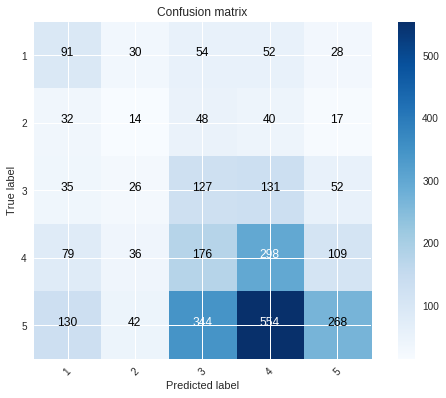

In [89]:
print("F1 weighted score %f" % f1_score(np.argmax(y_test, 1), np.argmax(y_pred, 1), average='weighted'))
print("F1 macro score %f" % f1_score(np.argmax(y_test, 1), np.argmax(y_pred, 1), average='macro'))
cnf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(y_pred, 1))
plot_confusion_matrix(cnf_matrix,[1,2,3,4,5])

In [74]:
y_train[200:220,:]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [70]:
test_data[:,4]

array([0.64628077, 0.1409099 , 0.24805814, ..., 0.7932067 , 0.23624058,
       0.49216738], dtype=float32)